# Практическое задание
## Урок 2. Масштабирование. Регуляризация. Стохастический градиентный спуск

#### 1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[  1,   1,   1,   1,    1,   1,    1,    1,   1,    1],
              [  1,   1,   2,   1,    3,   0,    5,   10,   1,    2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [  1,   1,   2,   1,    2,   1,    3,    3,   1,    2]])

In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [5]:
X_st = X.copy().astype(np.float64)
for i in range(1, X.shape[0]):
    X_st[i] = calc_std_feat(X[i])

In [6]:
X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

In [9]:
eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=1e-4)

array([57.39713014,  6.12102515,  1.4301203 ,  4.11587451])

In [10]:
lambdas = [1e-5, 3e-5, 1e-4, 3e-4, 1e-3, 3e-3, 1e-2, 3e-2, 1e-1, 3e-1, 1, 3, 10, 30, 100]

In [11]:
W_list = []
for lmbd in lambdas:
    W_list.append(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lmbd))

In [12]:
W_list = np.array(W_list).T
W_list

array([[57.399713  , 57.39913901, 57.39713014, 57.39139129, 57.37131434,
        57.31402896, 57.11442786, 56.55172414, 54.66666667, 49.91304348,
        38.26666667, 22.96      ,  9.56666667,  3.5875    ,  1.1254902 ],
       [ 6.12209394,  6.12185635,  6.12102515,  6.11865338,  6.11038803,
         6.08707545,  6.0088442 ,  5.8104048 ,  5.3118901 ,  4.58751097,
         3.66557478,  2.65656089,  1.42530532,  0.61858752,  0.20774643],
       [ 1.42892499,  1.42919072,  1.4301203 ,  1.43277205,  1.44200443,
         1.4679716 ,  1.55430443,  1.76732218,  2.25660813,  2.79229046,
         2.94352608,  2.40142183,  1.35226504,  0.59553368,  0.20104868],
       [ 4.11620609,  4.11613237,  4.11587451,  4.11513896,  4.11257825,
         4.10537768,  4.08144793,  4.02228439,  3.88109191,  3.66999589,
         3.25219037,  2.49152664,  1.37037873,  0.59938519,  0.2018609 ]])

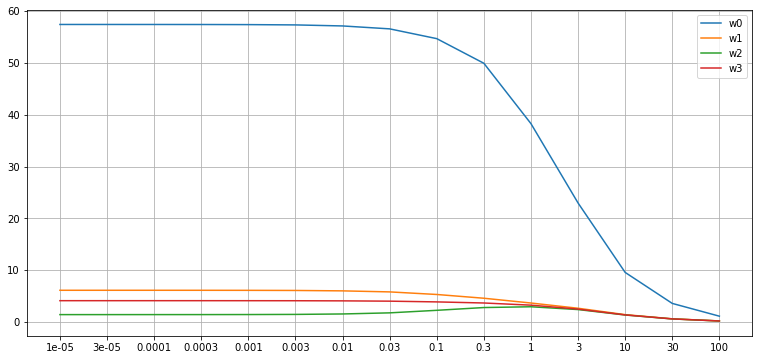

In [13]:
plt.figure(figsize=(13, 6))

x = np.arange(len(lambdas))
for i, w in enumerate(W_list):
    plt.plot(x, w, label='w'+str(i))
    
plt.setp(plt.legend(loc='upper right').get_texts(), color='black')
plt.grid()    
plt.xticks(x, lambdas)

plt.show()

Веса признаков, включая свободный коэффициент $w_0$ постепенно выравниваются. 

А затем при больших $\lambda$ все вместе начинают приближаться к $0$.

#### 2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

В принципе можно. Но смысла в этом нет. 

Признак в итоге будет или нормализован или стандартизован, в зависимости от того, какое масштабирование было сделано последним.

Поэтому лучше выполнить только одно масштабирование или нормализацию, или стандартизацию.

#### 3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

Вместо `lambda_ * W` в случае **L2** напишем `lambda_ * np.sign(W) / 2` для **L1**, так как производная модуля $x$ по $x$ равна знаку $x$ при $x \neq 0$. В нуле производная не определена, но у нас веса ненулевые.

Ещё добавится деление на 2, потому что в случае **L2** деление на двойку компенсировалось коэффициентом 2 от производной квадрата, а в случае **L1** нечем компенсировать.

In [15]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * np.sign(W) / 2) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [17]:
eval_model_reg1(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-4)

100 [49.85348982  3.66667278  3.48290021  4.46268208] 100.15366152011755
200 [56.39916349  4.16740442  3.16667541  4.31347221] 41.52197492599457
300 [57.26724782  4.55529065  2.89027122  4.20487976] 40.25689509644161
400 [57.38237278  4.86306387  2.65690445  4.13290614] 40.08337552073677
500 [57.3976406   5.10793351  2.46012679  4.08692802] 39.98154887503836
600 [57.39966541  5.3032643   2.29437096  4.05918053] 39.914689917027644
700 [57.39993394  5.45948042  2.15487284  4.04403553] 39.87030461711918
800 [57.39996956  5.58473183  2.0375674   4.03743851] 39.840622267508564
900 [57.39997428  5.68540604  1.93899468  4.03649015] 39.820644545758604
1000 [57.3999749   5.76652174  1.85621614  4.03913605] 39.80712279096825


array([57.3999749 ,  5.76652174,  1.85621614,  4.03913605])